In [1]:
!curl -s https://course.fast.ai/setup/colab | bash
from topic_model import *

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size="7"> **SENTIMENT ANALYSIS OF TOURIST REVIEWS** </font>
<font size="10"> **   ** </font>
                                                      
<font size="5">Enlightens your business with the power of perspectives</font>
<font size="4"> **   ** </font>
 Inside Engineering -
* Scrape Tripadvisor and Google Maps review data.
* Training the Language Model.
* Training the Classification Model.
* Topic tagging with LDA.
* Gaining insights through EDA with various plots.

* <font size="5">Sentiment Analysis</font>

Enter custom text to analyse it's sentiment -

In [2]:
learn.predict(
              'Good Boys'
             )

# 0 - Negative 
# 1 - Positive

(Category pos, tensor(1), tensor([0.0838, 0.9162]))

<font size="6">The beauty of transfer learning as explained, our classification model works not only on tourist data but on any English statement you could think of still giving promising results.</font>

Feeding large amounts of data by hand is never a feasible way so we leverage on Comma Separated Values (.csv), Below is a .csv file consisiting of scraped reviews from Lucknow Residency which our model has never seen. Let's see how it performs.

In [3]:
pd.read_csv('../input/hcldatacsv2/residency.csv').head(2)

,id_review,caption,timestamp,rating,username,n_review_user,n_photo_user,url_user
ChdDSUhNMG9nS0VJQ0FnSURVamZxampRRRABGhZQQ0VlVHJZRWF3RThURDlDdmhrekJ3,It's good. Really good. Has a lot of things to see and also a museum. Gives a good glimpse of the British phase of India and Civil Engineering of that time. Has a nominal entry fee of maybe ₹20. N...,2 months ago,2019-11-01 22:45:19.329061,4.0,Shivam Singh,0,0,https://www.google.com/maps/contrib/103032501000560900384?hl=en-IN
ChZDSUhNMG9nS0VJQ0FnSURVeTZtTldBEAEaFnlVRXZ3ZTNPZzg1NmxOYzFKRnFCMkE,"It is a place of historical importance. The residency was a home to approx. 3000 British soldiers. During the Revolt of 1857 for independence, our rebel forces successfully laid siege here and hel...",a month ago,2019-11-01 22:45:19.330786,4.0,Himanshu Srivastava,0,0,https://www.google.com/maps/contrib/115634539601337019241?hl=en-IN


A glimpse of the scraped google maps data, which will now be cleaned and preprocessed for sentiment analysis and topic modelling. 

In [4]:
df.head()

,review
0,Excellent place to visit while in Jaipur. I would highly recommend to plan your trip properly as this place requires significant amount of time. The palace gives you deeper insights of the life ...
1,Residential Place of the Kings and Queens of Jaipur. Gives you the Gist of the history of Jaipur throughout the British Empire Era in India. Partially accessable to Tourists. Student IDs definitel...
2,"The tour of the royal palace itself (not museum) is not worth Rs. 3500. Foreign tourists, please don’t bother with it. The grounds of the palace are not work the Rs. 700 either. Go visit Albert Ha..."
3,"A must visit place in Jaipur, Rajasthan, India. You must keep 3hrs minimum to enjoy the place. They charge you Rs200/person for entrance but it's totally worth it. Their are shops inside, right af..."
4,This is a go to place if you are interested in weapons. Overall a good experience. It would be more appropriate to hire a guide (you can get one for 200 or 400) if you are interested in the histor...


Getting predictions for this bunch of data with 1000 samples not humanly possible to analyse.

In [5]:
get_predictions(df)

,review,prediction
0,Excellent place to visit while in Jaipur. I would highly recommend to plan your trip properly as this place requires significant amount of time. The palace gives you deeper insights of the life ...,pos
1,Residential Place of the Kings and Queens of Jaipur. Gives you the Gist of the history of Jaipur throughout the British Empire Era in India. Partially accessable to Tourists. Student IDs definitel...,pos
2,"The tour of the royal palace itself (not museum) is not worth Rs. 3500. Foreign tourists, please don’t bother with it. The grounds of the palace are not work the Rs. 700 either. Go visit Albert Ha...",pos
3,"A must visit place in Jaipur, Rajasthan, India. You must keep 3hrs minimum to enjoy the place. They charge you Rs200/person for entrance but it's totally worth it. Their are shops inside, right af...",pos
4,This is a go to place if you are interested in weapons. Overall a good experience. It would be more appropriate to hire a guide (you can get one for 200 or 400) if you are interested in the histor...,pos
...,...,...
454,Do not see it...they are partial wid indians n foreigners...nothing to see inside with high rated ticket...jst fooling ppl...staff der is very bad mannered,neg
455,"First impression, last impression. This guy inside the tourist information desk started behaving rude. It's an expensive museum for people from the SAARC countries. Are you kidding me Rs3500 to se...",neg
456,Poor maintenance of wash basin and toilet,neg
457,Entry Tickets are very expensive. Waste of money.,neg


We also get to see the number of positive and negative reviews in our data.

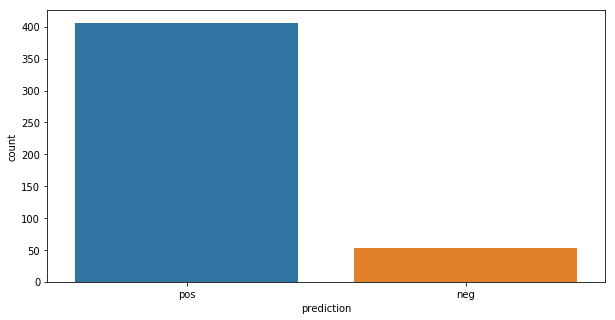

In [6]:
pos_neg_plot(df)

We can see how imbalanced the classes are but it is pretty obvious that negative reviews are lower in number than positives.

For our first phase we are simply going to plot the frequency plots for words in the whole dataframe.

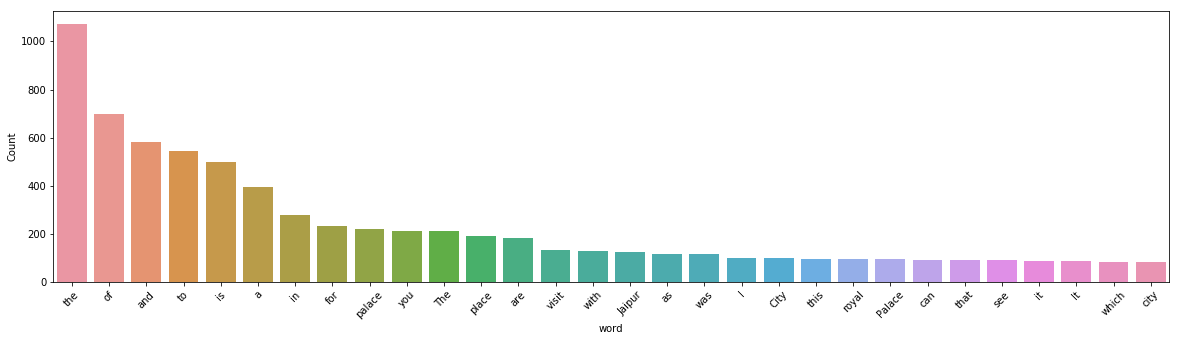

In [7]:
freq_words(50)

Doing some more data cleaning like removal of punctuation, stopwords and lemmatization could help us in finding more accurate tags. Notice a new column being added which will be the actual important data the mocel has filtered out to have itself trained on.

In [8]:
clean_data()
df.head()

,review,prediction,review_summ
0,Excellent place visit while Jaipur would highly recommend plan your trip properly this place requires significant amount time The palace gives you deeper insights the life the royal families Highl...,pos,excellent place visit plan trip significant amount time palace deep insight life royal family kid lot
1,Residential Place the Kings and Queens Jaipur Gives you the Gist the history Jaipur throughout the British Empire Era India Partially accessable Tourists Student IDs definitely help you want lower...,pos,residential place king gist history jaipur british accessable tourist student id low entry ticket price total time place hour worth armory quite variety weaponry armor
2,The tour the royal palace itself not museum not worth Foreign tourists please don bother with The grounds the palace are not work the either visit Albert Hall instead You get see gem laden room ni...,pos,worth foreign tourist ground palace work see gem laden room room amber fort cookie beverage end worth money
3,must visit place Jaipur Rajasthan India You must keep hrs minimum enjoy the place They charge you person for entrance but totally worth Their are shops inside right after the entrance you want som...,pos,place hrs minimum enjoy place person entrance worth shop right entrance traditional shopping tourist guide available outside palace help certain amount money fine interested history place hell lot...
4,This place you are interested weapons Overall good experience would more appropriate hire guide you can get one for you are interested the history the palace and Jaipur,pos,place interested weapon overall good experience hire guide interested history palace


Plotting frequency once again we start to see things improving.

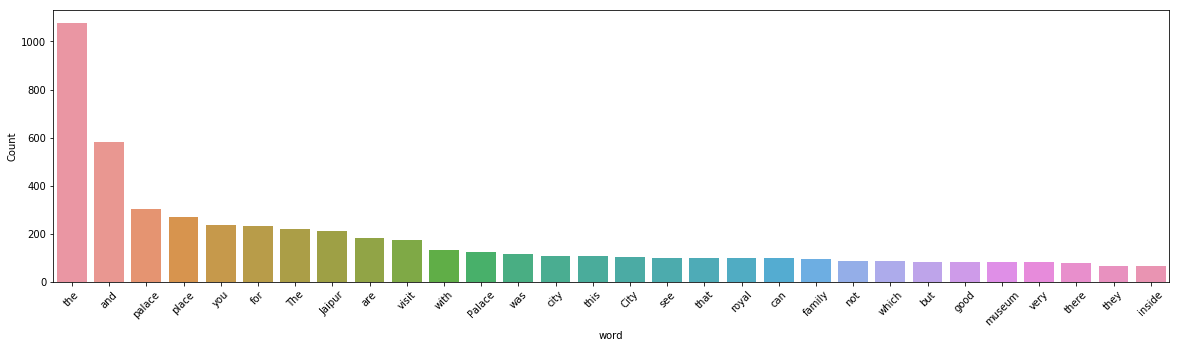

In [9]:
freq_words(50)

These are the tags our model has selected as being related to one another and having a considerable amout of contribution in the data. This is where our custom functions come in giving you the flexibility to view, analyse and plot data as you need it. A good example of the pipeline is here where you can call the fuction to get information related to the tag you want alongwith the reviews associated with the tag.

In [10]:
get_reviews_from_tag('palace')

Positive Percentage: 90.15544041450777, Negative Percentage: 9.844559585492235


,review,prediction,review_summ
0,Excellent place visit while Jaipur would highly recommend plan your trip properly this place requires significant amount time The palace gives you deeper insights the life the royal families Highl...,pos,excellent place visit plan trip significant amount time palace deep insight life royal family kid lot
2,The tour the royal palace itself not museum not worth Foreign tourists please don bother with The grounds the palace are not work the either visit Albert Hall instead You get see gem laden room ni...,pos,worth foreign tourist ground palace work see gem laden room room amber fort cookie beverage end worth money
3,must visit place Jaipur Rajasthan India You must keep hrs minimum enjoy the place They charge you person for entrance but totally worth Their are shops inside right after the entrance you want som...,pos,place hrs minimum enjoy place person entrance worth shop right entrance traditional shopping tourist guide available outside palace help certain amount money fine interested history place hell lot...
4,This place you are interested weapons Overall good experience would more appropriate hire guide you can get one for you are interested the history the palace and Jaipur,pos,place interested weapon overall good experience hire guide interested history palace
5,huge huge palace You need whole day discover properly Amazing place bring curious person such details things that need couple days there always prefer having audiobook You can get for discounted p...,pos,huge huge palace whole day amazing place curious person detail thing couple day price showing student staff counter helpful imagine beautiful place enjoy
...,...,...,...
440,The entry fee for Indian adults per head just for the museum but not all worth the ticket price For entering the royal palace need pay extra per head Totally disappointed The guides cost fpr team ...,neg,entry fee indian adult worth ticket price royal extra head guide fpr team
442,was very excited about this palace until learned the fact that one the king supported British during Sepoy mutiny,pos,excited fact king british sepoy mutiny
444,Can skipped without any regrets especially for foreign tourists Too expensive for what There are other monuments Rajasthan which are far more beautiful and don cost that much visit The very expens...,neg,regret foreign tourist expensive monument beautiful cost much expensive ticket full access facility audio poor quality gear wise term translation case language english item explanation high price ...
445,Nothing there Waste visit There are sing song like history Come and visit Mysore palace called history Waste time and money Jaipur Raja gave hospitality British called rental Like now are gave mon...,neg,waste visit song history history waste time hospitality rental money history


Oh! What? You own a place?
Okay we could help you to understand people more effectively and efficiently.
* Find out the best areas for it's effective marketing


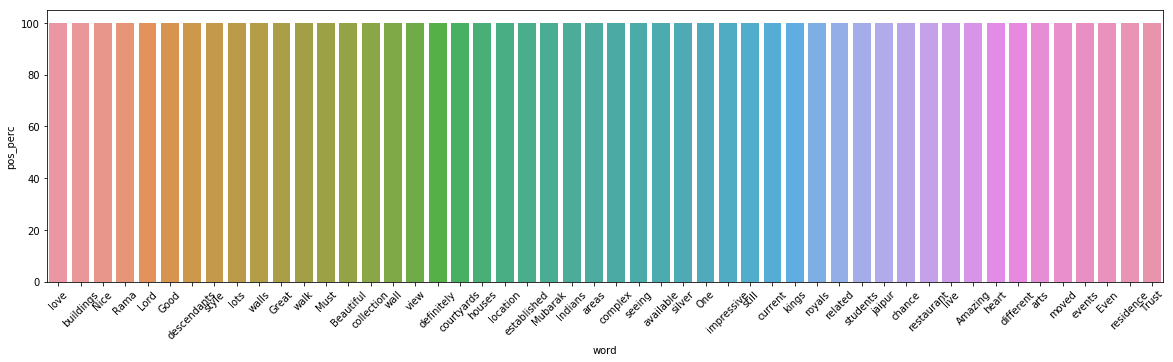

In [11]:
plot_postives(0,50)
# plot_postives(200,300)

# Plot the top 50 tags/topics with the most amout of positive response. 
# This is what reviewers Love!

The same approach can be applied to tags with highly negative reviews , these tags will essentially inform us about the things which need to be improved and worked on.

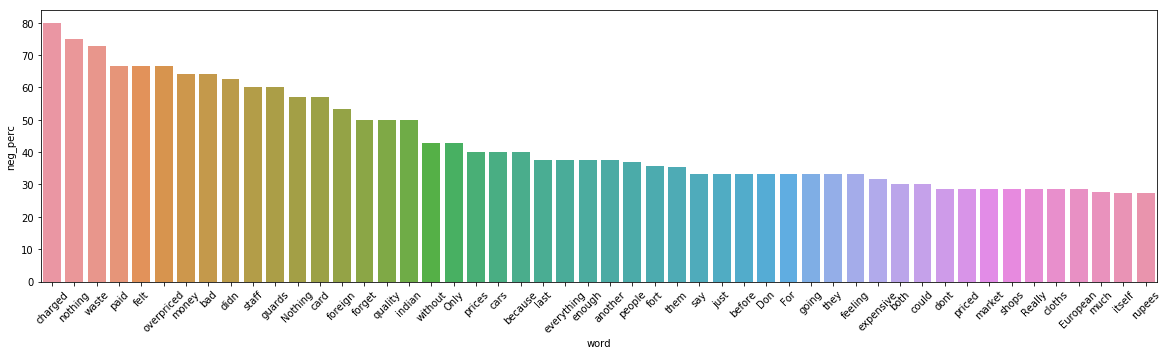

In [12]:
plot_negatives()